Integrantes: Luana Sekitani, Nathalia Faria e Vivian Fuke

In [ ]:
import pandas as pd

In [ ]:
notas = pd.read_csv('https://github.com/danieltb3006/DM_Ibmec/raw/main/notas_alunos_Ibmec.csv',encoding='ISO-8859-1',sep=';',decimal='.')

In [ ]:
print(notas)

   Curso          Alunos   AP1  AP2   Ap3
0    Adm            Joao   4.5  5.0   6.0
1    Dir           Pedro   7.9  9.0   7.0
2    Eco       Ana Maria   2.0  3.0   5.0
3     RI           Paulo  10.0  8.8   9.0
4    Adm           Maria   3.0  7.0   9.0
5    Adm        Priscila   8.0  6.5   4.0
6    Adm          Manoel   5.0  8.0   9.5
7    Dir      João Paulo   1.0  3.0   5.0
8    Eco       Ana Paula   4.5  3.0   7.5
9     RI           Joana   7.0  8.0   8.0
10   Eco          Raquel   2.9  7.0   NaN
11   Eco         Gabriel  10.0  6.0   9.0
12    RI          Rafael   3.0  9.0   4.0
13   Adm           Karen   8.0  7.0   6.0
14   Adm        Leonardo   1.0  8.0  10.0
15   Adm           Sofia   2.0  6.0   9.0
16   Dir            Davi   5.8  9.0   5.0
17   Eco            Luiz  10.0  9.5   8.0
18    RI           Paulo   7.0  8.0   6.0
19    RI          Celina   2.0  7.0   9.0
20   Eco         Antonio   3.5  9.0   3.5
21    RI        Roberson   4.0  6.0   6.0
22   Adm         Emerson   6.0  9.

In [ ]:
notas = notas.fillna(value=0.00)

In [ ]:
notas['Médias'] = notas['AP1']*0.4 + notas['AP2']*0.4 + notas['Ap3']*0.2

In [ ]:
for i in range (len(notas)):
  if (notas.loc[i,'Médias']<=3):
    notas.loc[i,'Situação']="REPROVADO"
  elif (notas.loc[i,'Médias']>=7):
    notas.loc[i,'Situação']="APROVADO"
  else:
    notas.loc[i,'Situação']="SUBSTITUTIVA"

In [ ]:
for i in range (len(notas)):
  if (notas.loc[i,'Curso']=='Adm'):
    notas.loc[i,'Curso']="Administração"
  elif (notas.loc[i,'Curso']=='Dir'):
    notas.loc[i,'Curso']="Direito"
  elif (notas.loc[i,'Curso']=='RI'):
    notas.loc[i,'Curso']="Relações Internacionais"
  elif (notas.loc[i,'Curso']=='Eco'):
    notas.loc[i,'Curso']="Economia"

In [ ]:
notas.groupby(by='Curso').mean()['Médias']

Curso
Administração              6.138571
Direito                    6.606667
Economia                   6.076364
Relações Internacionais    6.492000
Name: Médias, dtype: float64

In [ ]:
notas.groupby(by='Curso').min()['Médias']

Curso
Administração              3.74
Direito                    2.60
Economia                   3.00
Relações Internacionais    3.60
Name: Médias, dtype: float64

In [ ]:
notas.groupby(by='Curso').max()['Médias']

Curso
Administração              8.88
Direito                    8.16
Economia                   9.40
Relações Internacionais    9.32
Name: Médias, dtype: float64

In [ ]:
freq_notas = notas['Médias'].value_counts()

In [ ]:
tabela_notas = notas.query('Médias>7')
print(tabela_notas)

                      Curso        Alunos   AP1  AP2  Ap3  Médias  Situação
1                   Direito         Pedro   7.9  9.0  7.0    8.16  APROVADO
3   Relações Internacionais         Paulo  10.0  8.8  9.0    9.32  APROVADO
6             Administração        Manoel   5.0  8.0  9.5    7.10  APROVADO
9   Relações Internacionais         Joana   7.0  8.0  8.0    7.60  APROVADO
11                 Economia       Gabriel  10.0  6.0  9.0    8.20  APROVADO
13            Administração         Karen   8.0  7.0  6.0    7.20  APROVADO
17                 Economia          Luiz  10.0  9.5  8.0    9.40  APROVADO
18  Relações Internacionais         Paulo   7.0  8.0  6.0    7.20  APROVADO
23            Administração       Patrick   9.0  7.0  6.0    7.60  APROVADO
25                  Direito      Jonathas   7.0  7.5  9.0    7.60  APROVADO
30                  Direito  Pedro Manuel   8.5  8.0  7.0    8.00  APROVADO
32  Relações Internacionais        Felipe  10.0  6.0  9.0    8.20  APROVADO
33          

In [ ]:
media_notas = notas.pivot_table(values=['Ap3'],index=['Situação'],aggfunc='mean') #aggfunc='mean' min max count
print(media_notas)

                   Ap3
Situação              
APROVADO      8.006667
REPROVADO     5.000000
SUBSTITUTIVA  6.816667


In [ ]:
situacao_curso = pd.crosstab(notas.Situação,notas.Curso, margins=False)
print(situacao_curso)

Curso         Administração  Direito  Economia  Relações Internacionais
Situação                                                               
APROVADO                  4        3         4                        4
REPROVADO                 0        1         1                        0
SUBSTITUTIVA             10        2         6                        6


<Axes: xlabel='Situação'>

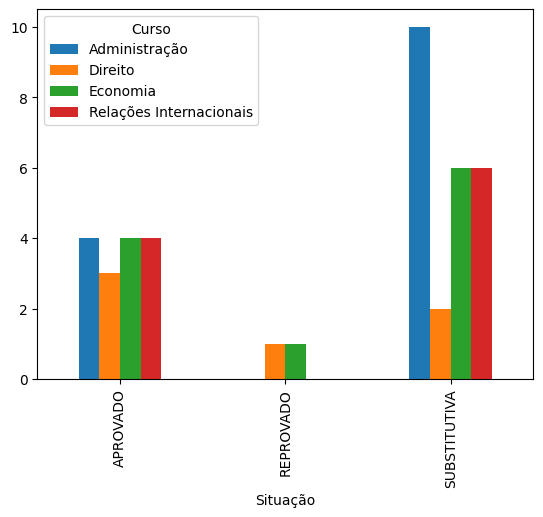

In [ ]:
# Gráfico de barras geral das médias x cursos

situacao_curso.plot.bar()

<Axes: ylabel='Frequency'>

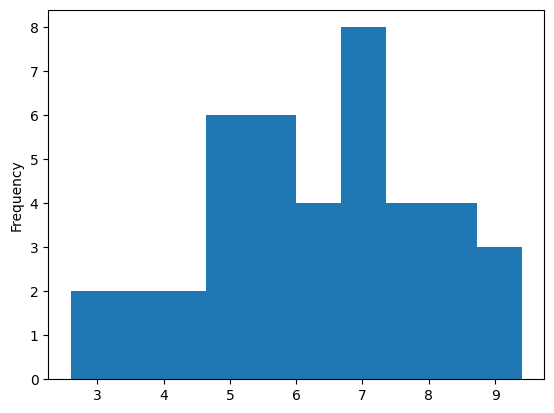

In [ ]:
# Histograma das médias
notas['Médias'].plot.hist()

In [ ]:
# Tabela de frequências - Situação
freq_situação = notas['Situação'].value_counts()

<Axes: title={'center': 'Situação dos Alunos'}, ylabel='Situação'>

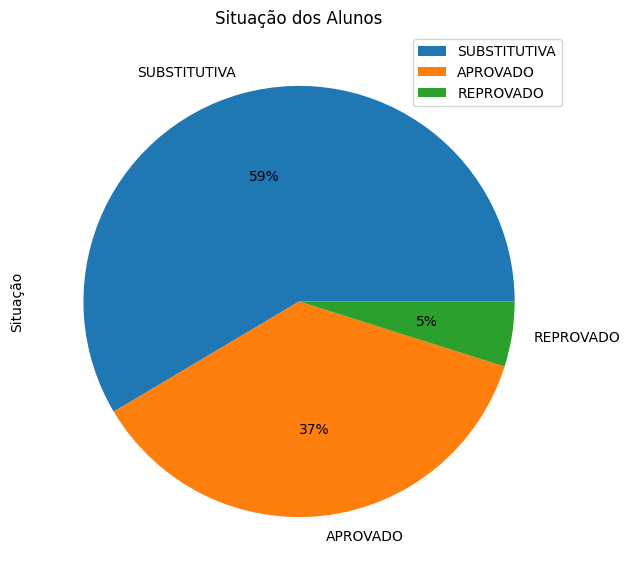

In [ ]:
# Gráfico de Pizza
freq_situação.plot.pie(title="Situação dos Alunos",legend=True,autopct='%.0f%%',figsize=(7, 7))

<Axes: >

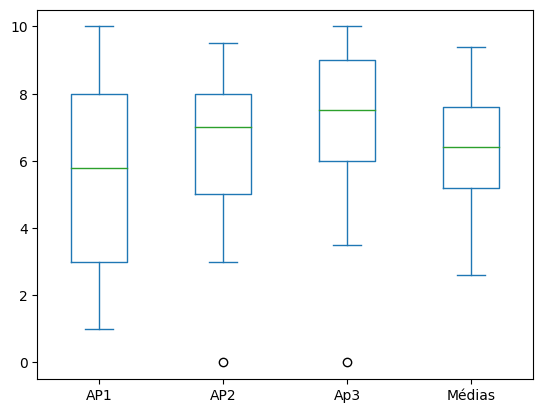

In [ ]:
notas.plot.box()

In [ ]:
'''Correlação entre as variáveis

- 0.9 para mais ou para menos indica uma correlação muito forte. 
- 0.7 a 0.9 positivo ou negativo indica uma correlação forte. 
- 0.5 a 0.7 positivo ou negativo indica uma correlação moderada. 
- 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.

'''

notas_corr = notas.corr(method ='pearson')
notas_corr

,AP1,AP2,Ap3,Médias
AP1,1.000000,0.234370,0.138337,0.834205
AP2,0.234370,1.000000,-0.124561,0.662685
Ap3,0.138337,-0.124561,1.000000,0.302108
Médias,0.834205,0.662685,0.302108,1.000000


In [ ]:
notas

,Curso,Alunos,AP1,AP2,Ap3,Médias,Situação
0,Administração,Joao,4.5,5.0,6.0,5.00,SUBSTITUTIVA
1,Direito,Pedro,7.9,9.0,7.0,8.16,APROVADO
2,Economia,Ana Maria,2.0,3.0,5.0,3.00,REPROVADO
3,Relações Internacionais,Paulo,10.0,8.8,9.0,9.32,APROVADO
4,Administração,Maria,3.0,7.0,9.0,5.80,SUBSTITUTIVA
5,Administração,Priscila,8.0,6.5,4.0,6.60,SUBSTITUTIVA
6,Administração,Manoel,5.0,8.0,9.5,7.10,APROVADO
7,Direito,João Paulo,1.0,3.0,5.0,2.60,REPROVADO
8,Economia,Ana Paula,4.5,3.0,7.5,4.50,SUBSTITUTIVA
9,Relações Internacionais,Joana,7.0,8.0,8.0,7.60,APROVADO
